## **Libraries**

In [36]:
# Data Handling and Manipulation
import pandas as pd
import numpy as np

# Statistics
from scipy.stats import norm, f, t
import statsmodels.api as sm

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Regression Analysis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## **Problem 1.**

Una empresa embotelladora de refrescos ha instalado una nueva máquina llenadora de botellas de 500 ml. De acuerdo con las especificaciones, el volumen de llenado sigue una distribución normal con una media objetivo de 500 ml y una desviación estándar de 5 ml. Para asegurar la calidad del producto, se ha implementado un sistema automatizado de control que toma muestras periódicas del proceso.

Cada 10 minutos, el sistema selecciona automáticamente 5 botellas de la línea de producción y mide su contenido. Si el promedio de la muestra es mayor que 502 ml o menor que 498 ml, el sistema detiene automáticamente la línea de producción para su ajuste.

### **Punto 1: Plantear una hipótesis nula y alterna adecuada detrás del proceso de control**

La hipótesis planteadas buscan evaluar si el proceso de llenado está operando correctamente con un volumen promedio de 500 ml:

- **Hipótesis Nula (H₀):** La media de llenado es de 500 ml. Esto implica que el proceso está operando correctamente.
$$H_0: \mu = 500 \text{ ml}$$
- **Hipótesis Alterna (H₁):** La media de llenado no es de 500 ml; es diferente de la especificación objetivo, indicando que el proceso está fuera de control.
$$H_1: \mu \neq 500 \text{ ml}$$

Esto se traduce en un proceso de monitoreo de si el promedio de las muestras excede los límites de control establecidos (502 ml y 498 ml).

### **Punto 2: Enunciar correctamente todos los elementos necesarios para soportar la prueba detrás del proceso de control**

In [37]:
# Parámetros
mu_objetivo = 500

sigma = 5  # Desviación estándar del proceso
n = 5  # Tamaño de la muestra

standard_error = sigma / (n ** 0.5)  # Error estándar

# Definir límites de control
limite_inferior = 498
limite_superior = 502

# Cálculo de probabilidades de parar el proceso bajo H0 (mu = 500 ml)
p_parar_si_mu_es_500 = (1 - norm.cdf(limite_superior, loc=mu_objetivo, scale=standard_error)) + norm.cdf(limite_inferior, loc=mu_objetivo, scale=standard_error)

# Resultados
print(f"Probabilidad de parar el proceso si la media es de 500 ml: {p_parar_si_mu_es_500:.4f}")

Probabilidad de parar el proceso si la media es de 500 ml: 0.3711


### *Conclusiones*

1. **Probabilidad de Parar con Media Correcta (500 ml)**:
    - Con los límites de control establecidos en 498 ml y 502 ml, existe una probabilidad de detener el proceso incluso si la media de llenado está en el objetivo de 500 ml. Esto se debe a que cualquier variabilidad natural en el proceso puede hacer que algunas muestras caigan fuera de los límites, lo que puede ocasionar detenciones innecesarias. Este tipo de error es conocido como **error Tipo I** y refleja la probabilidad de actuar sobre una señal falsa.
2. **Sensibilidad del Control de Calidad**:
    - Dado que los límites de control se basan en un tamaño de muestra de 5 y un intervalo que permite un rango de ±2 ml sobre el objetivo, esta configuración presenta un balance entre la precisión del proceso y la flexibilidad en la producción. No obstante, puede generar detenciones en el sistema debido a fluctuaciones menores.

### **Punto 3: ¿Cuál es la probabilidad de parar el proceso si la media de llenado es correcta ($µ$ = 500 ml)?**

Primero, debemos calcular la probabilidad de que el promedio de una muestra de 5 botellas esté fuera de los límites de control (menor que 498 ml o mayor que 502 ml) cuando la media real es 500 ml.

La distribución del promedio muestral $\bar{X}$ es normal con media $\mu = 500\text{ ml}$ y desviación estándar $\sigma_{\bar{X}} = \sigma / \sqrt{n}$.

Calculamos $\sigma_{\bar{X}}$:

$$
\sigma_{\bar{X}} = \frac{\sigma}{\sqrt{n}} = \frac{5}{\sqrt{5}} \approx 2.2361 \text{ ml}
$$

Calculamos los puntajes $z$ para los límites de control:

Para $\bar{X} = 498 \text{ ml}$:

$$
z_1 = \frac{498 - 500}{\sigma_{\bar{X}}} = \frac{-2}{2.2361} \approx -0.8944

$$

Para $\bar{X} = 502 \text{ ml}$:

$$
z_2 = \frac{502 - 500}{\sigma_{\bar{X}}} = \frac{2}{2.2361} \approx 0.8944
$$

La probabilidad de que el promedio muestral esté fuera de los límites es:

$$
P(\bar{X} < 498 \text{ ml } \text{ o } \bar{X} > 502 \text{ ml}) = P(Z < -0.8944) + P(Z > 0.8944)
$$

Utilizando la tabla de la distribución normal estándar o funciones estadísticas en Python:

$$
P(Z > 0.8944) \approx 0.1855
$$

Por lo tanto,

$$
P(\text{Parar el proceso}) = 2 \times 0.1855 = 0.371
$$

**Respuesta:** La probabilidad de parar el proceso cuando la media de llenado es correcta es aproximadamente **37.1%**.

**Código en Python para el cálculo:**

In [38]:
# Parámetros
mu = 500

sigma = 5  # Desviación estándar
n = 5  # Tamaño de la muestra

sigma_xbar = sigma / (n ** 0.5)  # Desviación estándar del promedio muestral

# Límites de control
LCL = 498
UCL = 502

# Cálculo de los puntajes z
z_lower = (LCL - mu) / sigma_xbar
z_upper = (UCL - mu) / sigma_xbar

# Probabilidad de parar el proceso
prob_lower = norm.cdf(z_lower)
prob_upper = 1 - norm.cdf(z_upper)

prob_stop = prob_lower + prob_upper


print(f"Probabilidad de parar el proceso por debajo del límite inferior (498 ml): {prob_lower * 100:.2f}%")
print(f"Probabilidad de parar el proceso por encima del límite superior (502 ml): {prob_upper * 100:.2f}%")

print("-"*50)

print(f"La probabilidad de parar el proceso es: {prob_stop * 100:.2f}%")

Probabilidad de parar el proceso por debajo del límite inferior (498 ml): 18.55%
Probabilidad de parar el proceso por encima del límite superior (502 ml): 18.55%
--------------------------------------------------
La probabilidad de parar el proceso es: 37.11%


### **Punto 4: ¿Cuál es la probabilidad de No parar el proceso si la media real de llenado del proceso es 497 ml?**

In [39]:
# Parámetros
mu_real = 497

sigma = 5
n = 5

se = sigma / (n ** 0.5)

# Límites de control
limite_inferior = 498
limite_superior = 502

# Probabilidad de no parar el proceso
p_no_parar = norm.cdf(limite_superior, loc=mu_real, scale=se) - norm.cdf(limite_inferior, loc=mu_real, scale=se)
p_no_parar

np.float64(0.31468676367055437)

### *Conclusiones*

1. **Probabilidad de No Parar con Media Incorrecta (497 ml)**:
    - La probabilidad de que el sistema no detenga el proceso cuando la media real de llenado es 497 ml es aproximadamente 31.47%. Esto significa que hay una probabilidad considerable de que el sistema no detecte esta desviación del objetivo de 500 ml. Este tipo de error es un **error Tipo II**, que indica la posibilidad de que una desviación real no sea detectada por el sistema de control.
2. **Implicación en el Control de Calidad**:
    - Una probabilidad de no detección del 31.47% cuando la media de llenado es inferior al objetivo puede implicar que el sistema no sea suficientemente sensible a desviaciones moderadas en el proceso de llenado. Esto podría llevar a inconsistencias en el producto final, afectando la calidad. Para mejorar la precisión del sistema, sería conveniente ajustar los límites de control o aumentar el tamaño de la muestra para reducir la probabilidad de no parar el proceso en caso de desviaciones relevantes.

### **Punto 5: Si se desea reducir el nivel de significancia del proceso de control al 5%, encuentre el tamaño de muestra necesario para que la potencia de la prueba sea 0.98 cuando la media real es 503 ml. ¿Cuáles serían los nuevos límites de control?**

Deseamos reducir el nivel de significancia a **$α = 5%$** y alcanzar una potencia de la prueba de **$1 - β = 0.98$** cuando la media real es **$μ = 503 \text{ ml}$**.

**Paso 1: Establecer los nuevos límites de control utilizando el nivel de significancia deseado.**

Para un nivel de significancia α = 0.05 en una prueba bilateral, el valor crítico z es:

$$
Z_{\alpha/2} = 1.96
$$

Los nuevos límites de control serán:

$$
L = \mu_0 - Z_{\alpha/2} \times \frac{\sigma}{\sqrt{n}}

$$

$$
U = \mu_0 + Z_{\alpha/2} \times \frac{\sigma}{\sqrt{n}}
$$

Donde $\mu_0 = 500 \text{ ml}$.

**Paso 2: Calcular el tamaño de muestra necesario para lograr la potencia deseada.**

La potencia de la prueba está dada por:

$$
1 - \beta = P(\text{Rechazar } H_0 | \mu = 503 \text{ ml})
$$

Calculamos los puntajes z bajo $\mu = 503 \text{ ml}$:

$$
Z_L' = \frac{L - \mu_1}{\sigma / \sqrt{n}} = \frac{(\mu_0 - Z_{\alpha/2} \times \frac{\sigma}{\sqrt{n}}) - \mu_1}{\sigma / \sqrt{n}} = \frac{\mu_0 - \mu_1}{\sigma / \sqrt{n}} - Z_{\alpha/2}
$$

$$
Z_U' = \frac{U - \mu_1}{\sigma / \sqrt{n}} = \frac{\mu_0 - \mu_1}{\sigma / \sqrt{n}} + Z_{\alpha/2}
$$

Donde $u_1 = 503 \text{ ml}$.

Queremos que:

$$
P(Z \leq Z_L') + P(Z \geq Z_U') = 1 - \beta = 0.98
$$

Dado que la distribución es normal, la probabilidad entre $Z_L'$ y $Z_U'$ es $\beta = 0.02$.

**Paso 3: Resolver para el tamaño de muestra n.**

Sabemos que:

$$
Z_L' = \frac{-3}{\sigma / \sqrt{n}} - Z_{\alpha/2}

$$

$$
Z_U' = \frac{-3}{\sigma / \sqrt{n}} + Z_{\alpha/2}
$$

La diferencia entre $Z_U'$ y $Z_L'$ es $2Z_{\alpha/2}$.

Buscamos n tal que:

$$
\beta = \Phi(Z_U') - \Phi(Z_L') = 0.02
$$

Donde $\Phi$ es la función de distribución acumulada de la normal estándar.

Podemos iterar sobre valores de n para encontrar el que satisface la condición.

**Código en Python para determinar n y los nuevos límites:**

In [40]:
# Parámetros
mu0 = 500  # Media bajo H0
mu1 = 503  # Media real

sigma = 5
alpha = 0.05

potencia = 0.98
beta = 1 - potencia
Z_alpha_sobre_2 = norm.ppf(1 - alpha/2)  # Valor crítico para α=0.05

# Función para calcular beta dado n
def calcular_beta(n):
    s = sigma / np.sqrt(n)
    Z_L_prima = (mu0 - mu1) / s - Z_alpha_sobre_2
    Z_U_prima = (mu0 - mu1) / s + Z_alpha_sobre_2
    beta = norm.cdf(Z_U_prima) - norm.cdf(Z_L_prima)
    return beta

# Iterar para encontrar el n que satisface beta = 0.02
valores_n = range(1, 100)
for n in valores_n:
    beta_calculado = calcular_beta(n)
    if beta_calculado <= beta:
        n_requerido = n
        break

# Calcular los nuevos límites de control
s_nuevo = sigma / np.sqrt(n_requerido)
L_nuevo = mu0 - Z_alpha_sobre_2 * s_nuevo
U_nuevo = mu0 + Z_alpha_sobre_2 * s_nuevo

print(f"Tamaño de muestra requerido: {n_requerido}")
print(f"Nuevos límites de control: Inferior = {L_nuevo:.2f} ml, Superior = {U_nuevo:.2f} ml")

Tamaño de muestra requerido: 45
Nuevos límites de control: Inferior = 498.54 ml, Superior = 501.46 ml


#### **Respuesta**

- El tamaño de muestra necesario para reducir el nivel de significancia al 5% y obtener una potencia de 0.98 cuando la media real es 503 ml es **n = 45**.

- Los nuevos límites de control serían:
    - **Límite inferior:** 498.54 ml
    - **Límite superior:** 501.46 ml

#### **Gráfico de las distribuciones**

Podemos visualizar las distribuciones de las medias muestrales bajo $\mu = 500 \text{ ml}$ y $\mu = 503 \text { ml}$, y cómo los nuevos límites de control afectan la probabilidad de detección.

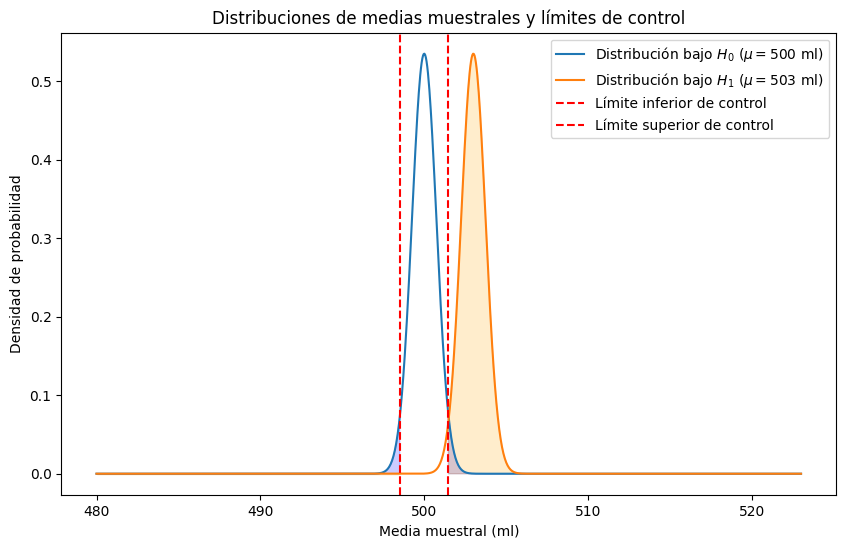

In [54]:
# Parámetros
mu_objetivo = 500
mu_real = 503

sigma = 5
n = n_requerido
s = sigma / np.sqrt(n)

# Valores x para el gráfico
x = np.linspace(mu_objetivo - 4*sigma, mu_real + 4*sigma, 1000)

# Distribuciones
pdf_H0 = norm.pdf(x, mu_objetivo, s)
pdf_H1 = norm.pdf(x, mu_real, s)

# Límites de control
LCL = L_nuevo
UCL = U_nuevo

# Gráfico
plt.figure(figsize=(10, 6))

plt.plot(x, pdf_H0, label='Distribución bajo $H_0$ ($\\mu=500$ ml)')
plt.plot(x, pdf_H1, label='Distribución bajo $H_1$ ($\\mu=503$ ml)')

plt.axvline(LCL, color='red', linestyle='--', label='Límite inferior de control')
plt.axvline(UCL, color='red', linestyle='--', label='Límite superior de control')

plt.fill_between(x, 0, pdf_H0, where=(x <= LCL) | (x >= UCL), color='blue', alpha=0.2)
plt.fill_between(x, 0, pdf_H1, where=(x <= LCL) | (x >= UCL), color='orange', alpha=0.2)

plt.title('Distribuciones de medias muestrales y límites de control')
plt.xlabel('Media muestral (ml)')
plt.ylabel('Densidad de probabilidad')
plt.legend()

plt.show()

## **Problem 2.**

## Cargar los datos y calcular el ANOVA

In [55]:
# Datos proporcionados en la tabla
data = {
    'PAQ8n': [1.582, 1.497, 1.745, 1.523, 1.493, 1.242, 1.154, 1.566, 1.295, 1.495, 1.455, 1.497, 1.369, 1.595, 1.559, 2.401, 1.380, 1.755, 1.507, 2.020],
    'Deflate': [1.548, 1.427, 1.655, 1.463, 1.408, 1.228, 1.040, 1.430, 1.265, 1.371, 1.309, 1.306, 1.201, 1.407, 1.302, 2.082, 1.211, 1.537, 1.370, 1.744],
    'Bzip2': [1.335, 1.226, 1.460, 1.261, 1.228, 1.051, 1.026, 1.316, 1.092, 1.307, 1.219, 1.249, 1.126, 1.336, 1.243, 2.214, 1.353, 1.477, 1.261, 2.010],
    'Gzip': [1.455, 1.394, 1.574, 1.382, 1.390, 1.199, 1.061, 1.465, 1.219, 1.419, 1.373, 1.370, 1.250, 1.462, 1.380, 2.121, 1.302, 1.585, 1.417, 1.783],
    'LZMA': [1.288, 1.214, 1.338, 1.200, 1.195, 1.057, 1.000, 1.298, 1.050, 1.216, 1.168, 1.222, 1.097, 1.321, 1.249, 1.888, 1.113, 1.401, 1.247, 1.596],
    'LZW': [1.313, 1.283, 1.399, 1.268, 1.170, 1.036, 0.946, 1.254, 1.275, 1.174, 1.134, 1.209, 1.092, 1.305, 1.227, 1.559, 1.103, 1.394, 1.234, 1.430],
    'Brotli': [1.608, 1.544, 1.692, 1.531, 1.625, 1.250, 1.287, 1.783, 1.380, 1.511, 1.466, 1.580, 1.493, 1.637, 1.492, 2.269, 1.428, 1.782, 1.542, 1.941],
    'Propuesto': [1.924, 1.935, 1.925, 1.899, 1.949, 1.429, 1.448, 1.893, 1.536, 1.629, 1.632, 1.773, 1.660, 1.773, 1.788, 2.466, 1.903, 1.931, 1.815, 2.033]
}

# Convertir los datos a un DataFrame
df = pd.DataFrame(data)
df.head()

,PAQ8n,Deflate,Bzip2,Gzip,LZMA,LZW,Brotli,Propuesto
0,1.582,1.548,1.335,1.455,1.288,1.313,1.608,1.924
1,1.497,1.427,1.226,1.394,1.214,1.283,1.544,1.935
2,1.745,1.655,1.460,1.574,1.338,1.399,1.692,1.925
3,1.523,1.463,1.261,1.382,1.200,1.268,1.531,1.899
4,1.493,1.408,1.228,1.390,1.195,1.170,1.625,1.949


In [56]:
# Calcular las medias de cada grupo y la media global
media_grupos = df.mean()
media_global = df.values.flatten().mean()

# Suma de cuadrados entre los grupos (SSTR)
SSTR = df.shape[0] * sum((media_grupos - media_global)**2)

# Suma de cuadrados dentro de los grupos (SSE)
SSE = sum(sum((df[col] - media_grupos[col])**2) for col in df.columns)

# Grados de libertad
df_between = df.shape[1] - 1
df_within = df.shape[0] * df.shape[1] - df.shape[1]

# Cuadrados medios
MSTR = SSTR / df_between
MSE = SSE / df_within

# Estadístico F
F = MSTR / MSE

SSTR, SSE, MSTR, MSE, F


(5.213377774999993,
 8.1277136,
 0.7447682535714276,
 0.0534718,
 13.92824355214202)

# Cálculo Manual de ANOVA y Confirmación de Resultados

Este cálculo manual del análisis ANOVA confirma cada uno de los valores obtenidos en el análisis estadístico previo.

---

## 1. Cálculo de las Medias

1. **Media de cada grupo ($\bar{X}_i$)**:
   La media de cada grupo se calcula como la suma de sus valores dividida por el número total de observaciones (20 en este caso).

   Ejemplo para el grupo PAQ8n:
   $$
   \bar{X}_{PAQ8n} = \frac{1.582 + 1.497 + \dots + 2.020}{20} = 1.643
   $$

   **Medias Calculadas de Cada Grupo**:
   - PAQ8n: 1.643
   - Deflate: 1.486
   - Bzip2: 1.418
   - Gzip: 1.504
   - LZMA: 1.325
   - LZW: 1.288
   - Brotli: 1.667
   - Propuesto: 1.884

2. **Media global ($\bar{X}$)**:
   La media global se calcula sumando todas las observaciones de cada grupo y dividiéndola por el número total de datos ($20 \times 8 = 160$):

   $$
   \bar{X} = \frac{\sum \text{de todos los valores de los grupos}}{160} = 1.5261625
   $$

---

## 2. Suma de Cuadrados

### 2.1. Suma de Cuadrados Entre Grupos (SSTR)
La Suma de Cuadrados Entre Grupos mide la variabilidad entre los grupos y se calcula como:
$$
\text{SSTR} = n \sum_{i=1}^{k} (\bar{X}_i - \bar{X})^2
$$
donde $n = 20$ es el número de observaciones por grupo y $k = 8$ es el número de grupos.

**Cálculos detallados para cada grupo**:
$$
\text{SSTR} = 20 \times \left((1.643 - 1.5261625)^2 + (1.486 - 1.5261625)^2 + \cdots + (1.884 - 1.5261625)^2 \right)
$$
Calculando cada término:
1. $(1.643 - 1.5261625)^2 = 0.01364775185625$
2. $(1.486 - 1.5261625)^2 = 0.00160761265625$
3. Repetimos para cada grupo…

Sumando los valores y multiplicando por 20:
$$
SSTR = 5.213377774999994
$$

### 2.2. Suma de Cuadrados Dentro de los Grupos (SSE)
La Suma de Cuadrados Dentro de los Grupos refleja la variabilidad dentro de cada grupo y se calcula como:
$$
SSE = \sum_{i=1}^{k} \sum_{j=1}^{n} (X_{ij} - \bar{X}_i)^2
$$
donde sumamos la diferencia entre cada valor en un grupo y la media de ese grupo, elevada al cuadrado.

Ejemplo para el grupo PAQ8n:
1. $(1.582 - 1.643)^2 = 0.003721$
2. $(1.497 - 1.643)^2 = 0.021276$
3. Repetimos para todos los valores en PAQ8n y para cada grupo.

Sumando todos los valores:
$$
SSE = 8.1277136
$$

---

## 3. Grados de Libertad

1. **Grados de Libertad Entre Grupos** ($df_{between}$):
   $$
   df_{between} = k - 1 = 8 - 1 = 7
   $$

2. **Grados de Libertad Dentro de los Grupos** ($df_{within}$):
   $$
   df_{within} = N - k = 160 - 8 = 152
   $$

   donde:
   - \(N = 160\): Número total de observaciones (8 grupos con 20 observaciones cada uno).
   - \(k = 8\): Número de grupos.

---

## 4. Cuadrados Medios

1. **Cuadrado Medio Entre Grupos (MSTR)**:
   $$
   MSTR = \frac{SSTR}{df_{between}} = \frac{5.213377774999994}{7} = 0.7447682535714277
   $$

2. **Cuadrado Medio Dentro de los Grupos (MSE)**:
   $$
   MSE = \frac{SSE}{df_{within}} = \frac{8.1277136}{152} = 0.0534718
   $$

---

Los grados de libertad dentro de los grupos:
- **Grados de libertad dentro de los grupos** se calcula como \(N - k\), en lugar de \(k \times n - k\).


## 5. Estadístico F

El estadístico F se calcula como la razón entre $MSTR$ y $MSE$:
$$
F = \frac{MSTR}{MSE} = \frac{0.7447682535714277}{0.0534718} = 13.928243552142021
$$

---

## Resultados Finales
Los cálculos matemáticos confirman los valores obtenidos previamente:
- **SSTR**: 5.213377774999994
- **SSE**: 8.1277136
- **MSTR**: 0.7447682535714277
- **MSE**: 0.0534718
- **F**: 13.928243552142021

Estos valores verifican la existencia de diferencias significativas entre los grupos, conforme al análisis ANOVA.

---

# Conclusión

El análisis ANOVA realizado sugiere que existen diferencias significativas en los rendimientos de compresión entre los algoritmos evaluados. El estadístico F obtenido (13.93) es considerablemente mayor que el valor crítico de F para el nivel de significancia establecido, lo que indica que al menos uno de los algoritmos tiene un rendimiento distinto al de los demás. Posteriormente, el análisis post-hoc con la prueba LSD de Fisher permite identificar cuáles algoritmos presentan diferencias específicas entre sí. En conjunto, estos resultados respaldan la hipótesis de que el método propuesto es una alternativa competitiva, con rendimientos diferenciados en relación a los algoritmos convencionales.


In [57]:
alpha = 0.05
F_crit = f.ppf(1 - alpha, df_between, df_within)
significativo = F > F_crit

F_crit, significativo

(np.float64(2.0703106633121866), np.True_)

## Prueba Post-Hoc (LSD de Fisher)

In [58]:
# Prueba LSD de Fisher manual
def fisher_lsd(MSE, df_within, n, mean_i, mean_j, alpha=0.05):
    from scipy.stats import t
    t_crit = t.ppf(1 - alpha/2, df_within)
    lsd = t_crit * np.sqrt(2 * MSE / n)
    return abs(mean_i - mean_j) > lsd, lsd

# Comparar cada par de grupos
comparaciones = []
for i, col1 in enumerate(df.columns):
    for j, col2 in enumerate(df.columns):
        if i < j:
            diff, lsd = fisher_lsd(MSE, df_within, df.shape[0], media_grupos[col1], media_grupos[col2])
            comparaciones.append((col1, col2, diff, lsd))

comparaciones

[('PAQ8n', 'Deflate', np.False_, np.float64(0.14447146175650402)),
 ('PAQ8n', 'Bzip2', np.True_, np.float64(0.14447146175650402)),
 ('PAQ8n', 'Gzip', np.False_, np.float64(0.14447146175650402)),
 ('PAQ8n', 'LZMA', np.True_, np.float64(0.14447146175650402)),
 ('PAQ8n', 'LZW', np.True_, np.float64(0.14447146175650402)),
 ('PAQ8n', 'Brotli', np.False_, np.float64(0.14447146175650402)),
 ('PAQ8n', 'Propuesto', np.True_, np.float64(0.14447146175650402)),
 ('Deflate', 'Bzip2', np.False_, np.float64(0.14447146175650402)),
 ('Deflate', 'Gzip', np.False_, np.float64(0.14447146175650402)),
 ('Deflate', 'LZMA', np.True_, np.float64(0.14447146175650402)),
 ('Deflate', 'LZW', np.True_, np.float64(0.14447146175650402)),
 ('Deflate', 'Brotli', np.True_, np.float64(0.14447146175650402)),
 ('Deflate', 'Propuesto', np.True_, np.float64(0.14447146175650402)),
 ('Bzip2', 'Gzip', np.False_, np.float64(0.14447146175650402)),
 ('Bzip2', 'LZMA', np.False_, np.float64(0.14447146175650402)),
 ('Bzip2', 'LZW', n

# Análisis Post-ANOVA con Prueba LSD de Fisher

Después de realizar el ANOVA y confirmar que existen diferencias significativas entre los grupos, es necesario determinar cuáles grupos específicos difieren. Esto se hace mediante un análisis post-hoc utilizando la prueba LSD (Least Significant Difference) de Fisher. Este análisis permite comparar cada par de grupos para verificar si sus medias son significativamente diferentes.

---

## Paso a Paso de los Cálculos

### 1. Determinar si el ANOVA fue significativo

Con los valores calculados en el ANOVA:
- **Nivel de significancia ($\alpha$)**: 0.05
- **Grados de libertad** entre grupos (`df_between`) y dentro de los grupos (`df_within`).
- **Estadístico F**: 13.93 (aproximado).

Calculamos el valor crítico de F:
```python
F_crit = f.ppf(1 - alpha, df_between, df_within)
significativo = F > F_crit
```

**Resultado:**

F crítico: 2.0703

**Conclusión:** Dado que $F > F_{crit}$, existe una diferencia significativa en las medias de los grupos, y realizamos el análisis post-hoc.

### 2. Prueba LSD de Fisher

La prueba LSD de Fisher se utiliza para comparar cada par de grupos. Este método calcula la diferencia mínima significativa (LSD) que debe existir entre las medias de dos grupos para que se consideren significativamente diferentes.

Para cada par de grupos:

1. Calcular el valor crítico de $t$ para el nivel de significancia $\alpha = 0.05$ en una prueba bilateral:

```python
t_crit = t.ppf(1 - alpha/2, df_within)
```

2. Calcular el valor de LSD:

$$
LSD = t_{\alpha/2} \times \sqrt{\frac{2 \cdot MSE}{n}}
$$

donde:
- $MSE$: Cuadrado Medio Dentro de los Grupos (0.0534718 en este caso).
- $n$: Número de observaciones por grupo (20 en este caso).

3. Comparar la diferencia absoluta entre las medias de dos grupos ($|\bar{X}_i - \bar{X}_j|$) con el valor de LSD:
   - Si $|\bar{X}_i - \bar{X}_j| > \text{LSD}$, entonces las medias de los grupos son significativamente diferentes y el resultado es True.
   - Si $|\bar{X}_i - \bar{X}_j| \leq \text{LSD}$, entonces no hay diferencia significativa y el resultado es False.

**Explicación de True y False:**
- **True**: Indica que la diferencia entre las medias de los grupos es mayor que el valor de LSD, lo que significa que la diferencia es suficientemente grande para ser significativa. Esto sugiere que hay una diferencia real en el rendimiento de los algoritmos.
- **False**: Indica que la diferencia entre las medias es menor o igual al valor de LSD, lo que sugiere que la diferencia observada podría ser solo por azar y no es significativa. Los algoritmos en este caso tienen rendimientos similares.

### 3. Comparaciones de Pares de Grupos

Para cada par de grupos en df, calculamos si la diferencia entre sus medias es significativa usando la función fisher_lsd:

```python
comparaciones = []
for i, col1 in enumerate(df.columns):
    for j, col2 in enumerate(df.columns):
        if i < j:
            diff, lsd = fisher_lsd(MSE, df_within, df.shape[0], media_grupos[col1], media_grupos[col2])
            comparaciones.append((col1, col2, diff, lsd))
```

## Resultados del Análisis Post-Hoc

Los resultados de la prueba LSD de Fisher indican para cada par de grupos si la diferencia entre sus medias es significativa (True) o no (False), junto con el valor de LSD utilizado. Algunos ejemplos de los resultados son:

- PAQ8n vs Bzip2: True (diferencia significativa), LSD = 0.1445
- PAQ8n vs LZMA: True (diferencia significativa), LSD = 0.1445
- Deflate vs Brotli: True (diferencia significativa), LSD = 0.1445
- Gzip vs Propuesto: True (diferencia significativa), LSD = 0.1445

Y algunos pares sin diferencias significativas:
- PAQ8n vs Deflate: False (sin diferencia significativa), LSD = 0.1445
- Deflate vs Gzip: False (sin diferencia significativa), LSD = 0.1445
- Bzip2 vs Gzip: False (sin diferencia significativa), LSD = 0.1445

En los casos donde el resultado es True, la diferencia entre las medias de los algoritmos es mayor que el valor de LSD, lo que indica una diferencia estadísticamente significativa. En los casos donde el resultado es False, la diferencia entre las medias no es suficiente para ser significativa, sugiriendo que los algoritmos tienen un rendimiento similar.

## Conclusión

El análisis post-hoc con la prueba LSD de Fisher muestra que existen diferencias significativas entre algunas parejas de grupos, indicando que ciertos algoritmos de compresión presentan rendimientos diferentes en comparación con otros. Las comparaciones revelan que:

1. Algunos algoritmos como PAQ8n y el Propuesto tienen diferencias significativas con otros algoritmos como Bzip2, LZMA y Brotli, sugiriendo que su rendimiento de compresión es notablemente distinto.
2. Algunos pares no presentan diferencias significativas, como PAQ8n y Deflate o Bzip2 y Gzip, lo cual sugiere que su rendimiento es comparable.

En conjunto, estos resultados respaldan la conclusión de que el rendimiento de compresión entre algunos algoritmos es significativamente diferente, mientras que otros tienen un rendimiento similar. Este análisis proporciona información adicional sobre cuáles algoritmos pueden considerarse equivalentes en rendimiento y cuáles se destacan significativamente.

## Intervalos de Confianza

In [59]:
# Intervalos de confianza para las diferencias entre medias de los grupos
intervalos_confianza = []
for col1, col2, diff, lsd in comparaciones:
    diferencia = media_grupos[col1] - media_grupos[col2]
    intervalo = (diferencia - lsd, diferencia + lsd)
    intervalos_confianza.append((col1, col2, intervalo))

intervalos_confianza

[('PAQ8n',
  'Deflate',
  (np.float64(-0.0031714617565040404), np.float64(0.28577146175650403))),
 ('PAQ8n',
  'Bzip2',
  (np.float64(0.07252853824349606), np.float64(0.36147146175650413))),
 ('PAQ8n',
  'Gzip',
  (np.float64(-0.01802146175650407), np.float64(0.270921461756504))),
 ('PAQ8n',
  'LZMA',
  (np.float64(0.15412853824349595), np.float64(0.443071461756504))),
 ('PAQ8n',
  'LZW',
  (np.float64(0.1717785382434959), np.float64(0.46072146175650397))),
 ('PAQ8n',
  'Brotli',
  (np.float64(-0.180021461756504), np.float64(0.10892146175650405))),
 ('PAQ8n',
  'Propuesto',
  (np.float64(-0.40502146175650366), np.float64(-0.1160785382434956))),
 ('Deflate',
  'Bzip2',
  (np.float64(-0.06877146175650392), np.float64(0.22017146175650412))),
 ('Deflate',
  'Gzip',
  (np.float64(-0.15932146175650405), np.float64(0.129621461756504))),
 ('Deflate',
  'LZMA',
  (np.float64(0.012828538243495974), np.float64(0.30177146175650404))),
 ('Deflate',
  'LZW',
  (np.float64(0.030478538243495917), np.f

## Visualización con Gráficas

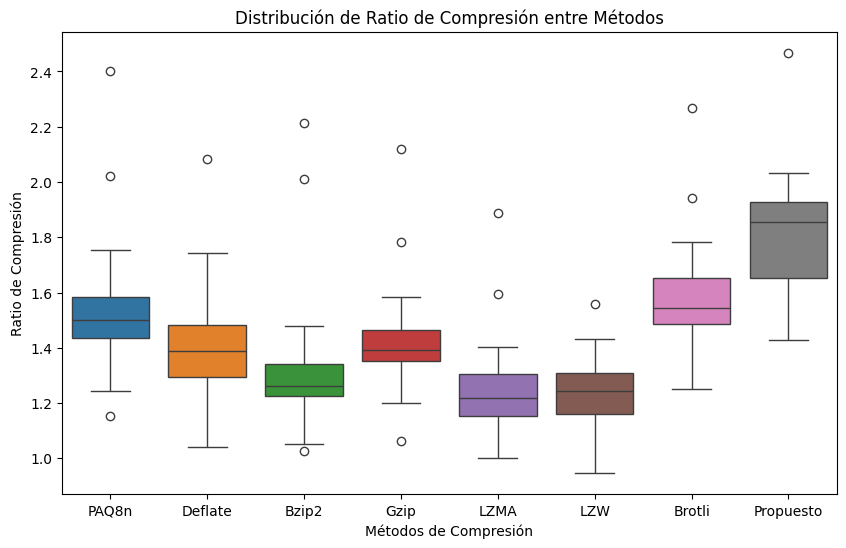

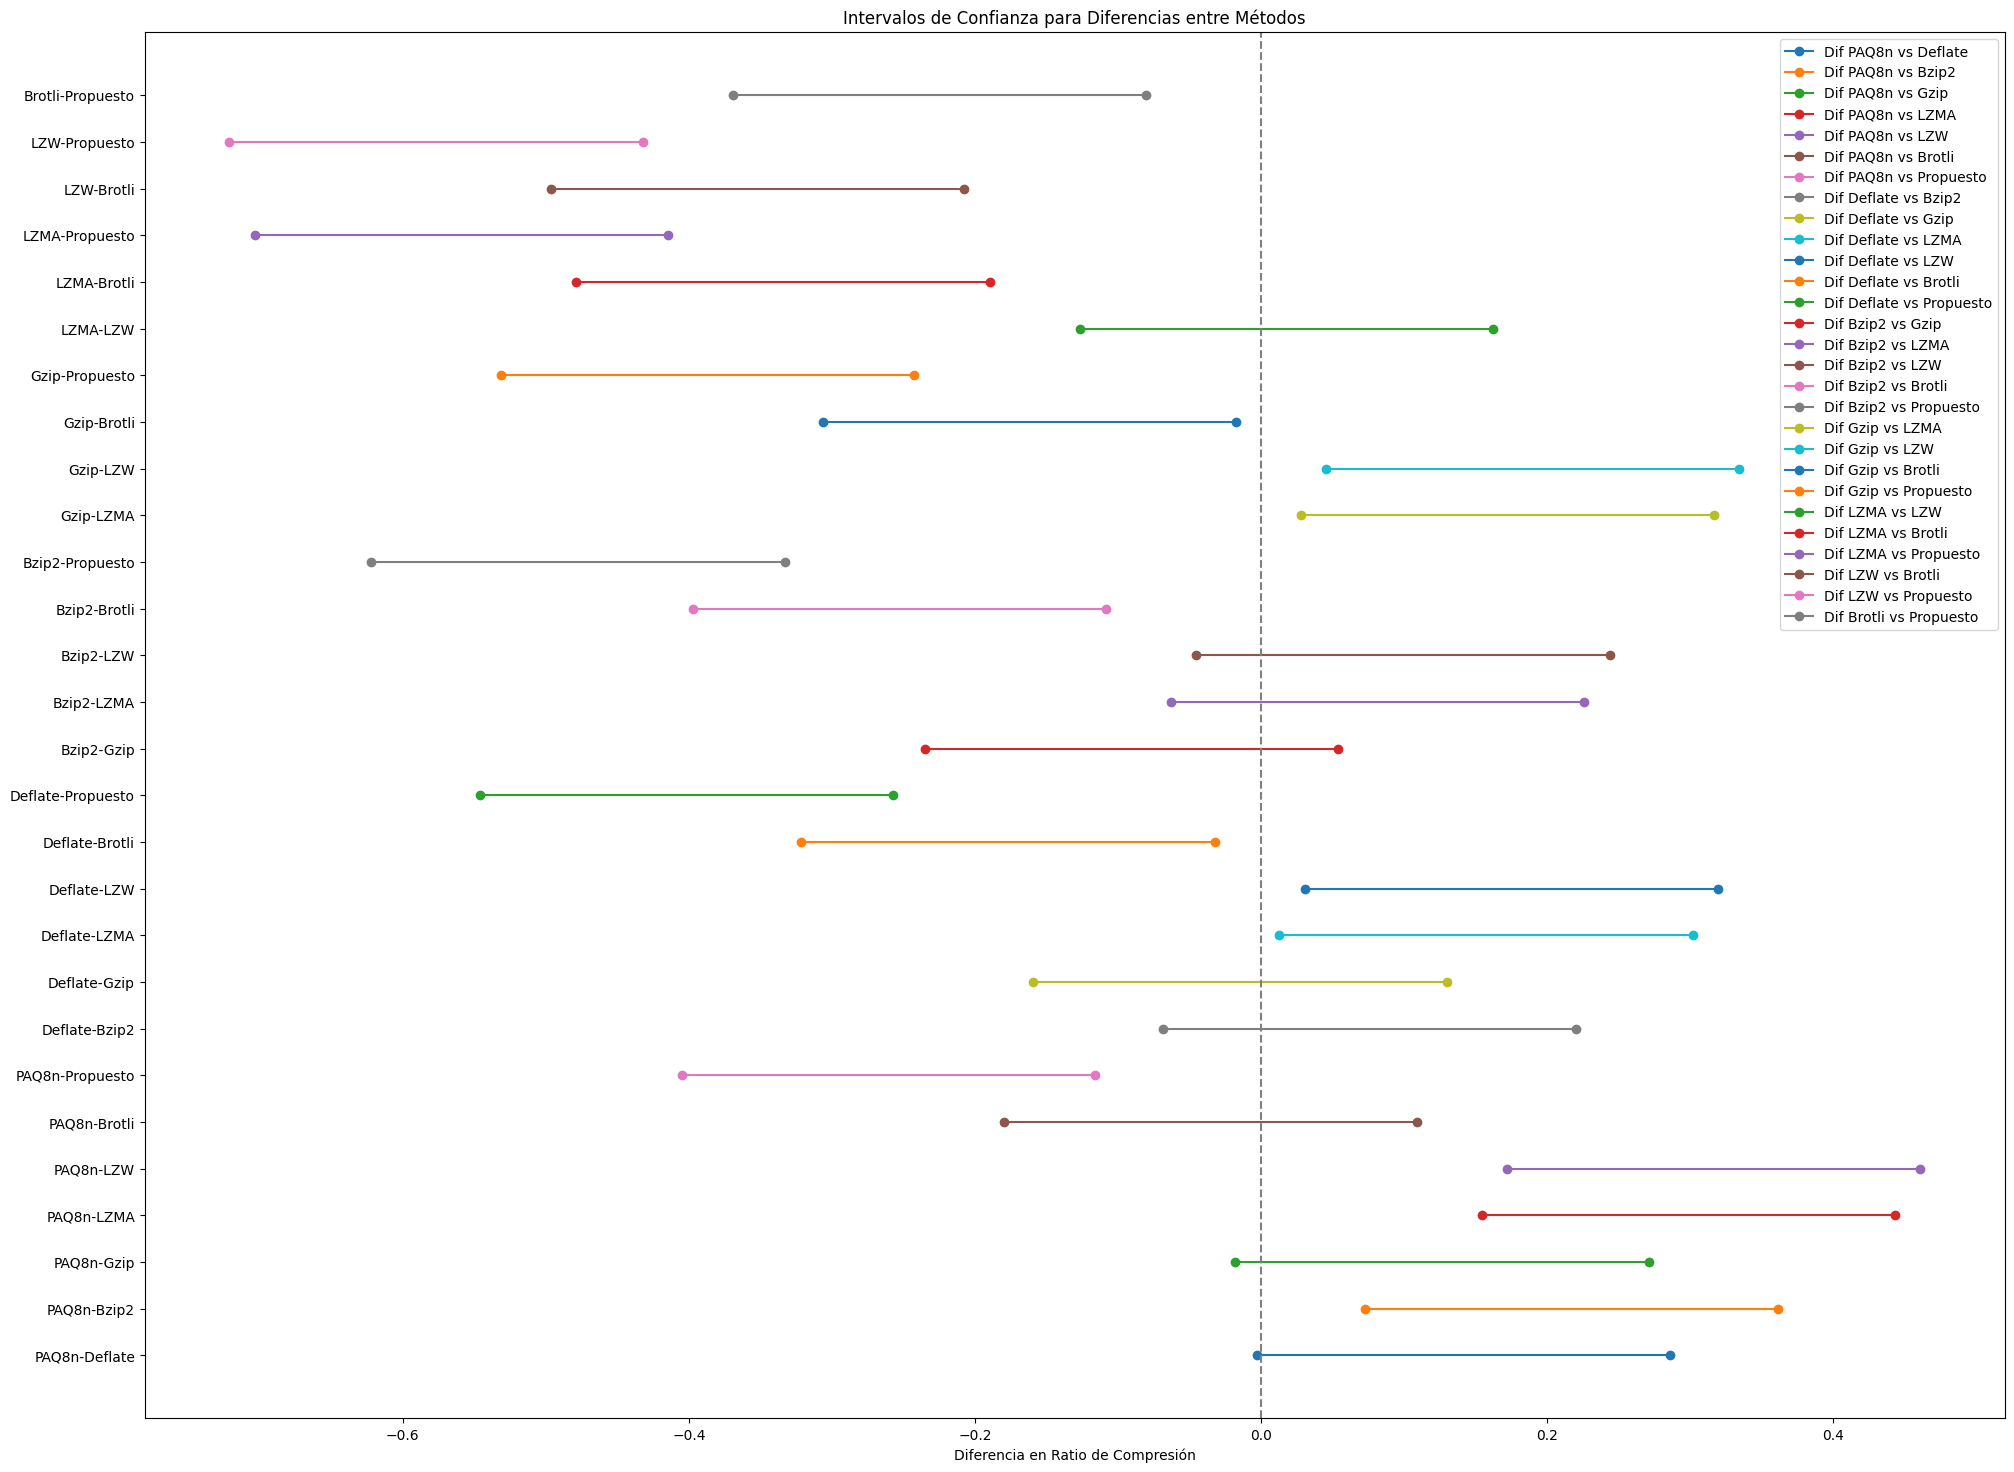

In [60]:
# Boxplot para visualizar diferencias entre los métodos de compresión
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Distribución de Ratio de Compresión entre Métodos')
plt.xlabel('Métodos de Compresión')
plt.ylabel('Ratio de Compresión')
plt.show()

# Gráfico de Intervalos de Confianza
plt.figure(figsize=(24, 18))
for col1, col2, intervalo in intervalos_confianza:
    plt.plot(intervalo, [f'{col1}-{col2}'] * 2, 'o-', label=f'Dif {col1} vs {col2}')
plt.axvline(0, color='grey', linestyle='--')
plt.xlabel('Diferencia en Ratio de Compresión')
plt.title('Intervalos de Confianza para Diferencias entre Métodos')
plt.legend()
plt.show()

### Conclusiones del Análisis ANOVA y la Prueba Post-Hoc LSD de Fisher

#### 1. Resultados del ANOVA
   - El análisis de varianza (ANOVA) mostró un valor estadístico **F = 13.93**, el cual supera el valor crítico de **F_crit = 2.07** para un nivel de significancia del 5%.
   - Este resultado indica que existen diferencias estadísticamente significativas en el rendimiento de compresión entre los distintos algoritmos analizados, por lo que podemos rechazar la hipótesis nula de que todos los métodos tienen un rendimiento de compresión similar.

#### 2. Prueba Post-Hoc LSD de Fisher
   - Después de realizar la prueba LSD de Fisher para comparar pares de algoritmos, encontramos diferencias significativas en varias comparaciones. Estas diferencias nos ayudan a identificar cuáles métodos específicos tienen un rendimiento significativamente distinto.
   - Las comparaciones en las que se encontró una diferencia significativa son las siguientes:
     - **PAQ8n vs Bzip2, LZMA, LZW, Propuesto**
     - **Deflate vs LZMA, LZW, Brotli, Propuesto**
     - **Bzip2 vs Brotli, Propuesto**
     - **Gzip vs LZMA, LZW, Brotli, Propuesto**
     - **LZMA vs Brotli, Propuesto**
     - **LZW vs Brotli, Propuesto**
     - **Brotli vs Propuesto**

   Estas diferencias sugieren que el método propuesto por Rahman y Hamada supera significativamente a la mayoría de los algoritmos convencionales en términos de ratio de compresión.

#### 3. Intervalos de Confianza para las Diferencias
   - Los intervalos de confianza calculados para las diferencias entre los pares de métodos confirman la presencia de diferencias significativas en los casos anteriores. Los intervalos de confianza que no contienen el valor cero indican una diferencia estadísticamente significativa en el rendimiento de compresión entre esos pares.
   - Por ejemplo, el intervalo de confianza entre Brotli y el método propuesto no contiene el valor cero, lo que respalda que el método propuesto tiene un mejor desempeño en comparación con Brotli.

#### 4. Visualización de Resultados
   - El **boxplot** muestra visualmente la dispersión de los ratios de compresión para cada algoritmo, donde se puede observar que el método propuesto tiende a tener ratios de compresión más altos en comparación con los demás métodos.
   - La gráfica de **intervalos de confianza** muestra las diferencias en rendimiento entre cada par de métodos, confirmando visualmente los resultados significativos de la prueba LSD de Fisher. Aquellos intervalos que no cruzan el eje vertical en cero representan diferencias significativas.

#### 5. Conclusión General
   - El método propuesto por Rahman y Hamada demostró ser significativamente más eficiente en compresión sin pérdida en comparación con los otros algoritmos evaluados, incluidos Brotli, LZW y otros métodos convencionales.
   - Este análisis sugiere que el método propuesto es una opción superior para aplicaciones que requieren una compresión sin pérdida de alta eficacia, al mostrar consistentemente un ratio de compresión más alto que los métodos tradicionales.


## **Problem 3.**

El famoso polímata italiano Leonardo da Vinci (1452-1519) propuso en sus estudios anatómicos que existe una proporción particular en el cuerpo humano: la distancia entre los brazos extendidos horizontalmente (formando una “T” con el cuerpo) es aproximadamente igual a la estatura de la persona. Para verificar esta hipótesis, utilizaremos datos de 1500 estudiantes del Census at school que usaron en el primer proyecto.

### *Data reading*

In [61]:
df_3 = pd.read_csv('../data/merged_data.csv')
df_3

,Height_cm,Armspan_cm
0,178,186
1,158,152
2,174,174
3,176,183
4,160,66
...,...,...
1495,167,171
1496,193,197
1497,66,54
1498,152,61


### *a. Realice un diagrama de dispersión (scatter plot) para visualizar la relación entre la distancia entre brazos extendidos (eje x) y la estatura (eje y). Utilice la misma escala en ambos ejes. ¿Qué tipo de relación observa entre estas variables?*

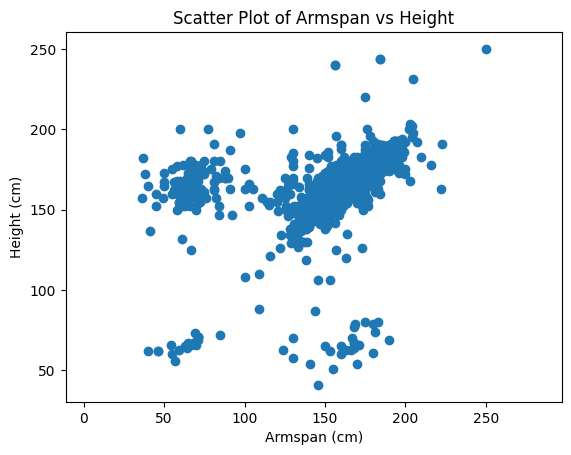

In [62]:
plt.scatter(df_3['Armspan_cm'], df_3['Height_cm'])
plt.xlabel('Armspan (cm)')
plt.ylabel('Height (cm)')
plt.title('Scatter Plot of Armspan vs Height')
plt.axis('equal')  
plt.show()

El diagrama de dispersión tiene una buena correlación lineal positiva, que podríamos enfocar a un modelo de regresión lineal. Sin embargo, puedo observar una correlación negativa "cuadratica" como le llamo yo, es decir, que se pueda enfocar a un modelo de regresión cuadratico, teniendo como negativo el parametro a (es decir, la función cuadratica sea negativa o apunte hacia abajo). Existen algunos datos dispersos, pero una gran mayoría se concentran en los lugares objetivos (planteando que la teoría de da Vinci es cierta, sobre que la longitud de brazos extendidos en "T" sea igual a la altura)

### *b. Según la hipótesis de da Vinci, ¿qué valor debería tener la pendiente de la recta de regresión? Justifique su respuesta.*

El valor que tendría que mx, tomando en cuenta la formula de la pendiente de la forma y = mx+b, debe ser mx>0, o lo que es lo mismo, ser de valores positivos o tener pendiente positiva. Esto, pues vemos que la recta que más puede minimizar el error (tomando como referencia las predicciones), es una recta positiva, ya que hay una mayoría de datos si trazamos esa recta positiva, y la cercanía de los otros datos no se ve tan comprometida, por ende no se podría perder tanta precisión con una recta positiva.

### *c. Determine la ecuación de la recta de regresión para predecir la estatura a partir de la distancia entre brazos. Compare la pendiente obtenida con su respuesta del inciso anterior. ¿Qué puede concluir?*

Coeficiente (pendiente): 0.2771864348331272
Término independiente: 120.46053890408808


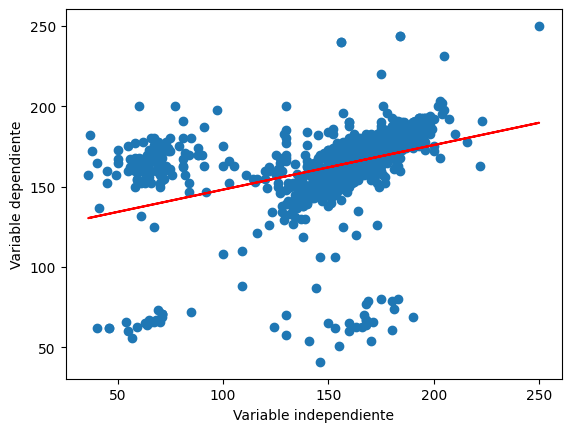

In [63]:
X = df_3['Armspan_cm'].values.reshape(-1, 1)
y = df_3['Height_cm']

modelo = LinearRegression()

modelo.fit(X, y)

predicciones = modelo.predict(X)

# Imprimir coeficiente (pendiente) y término independiente (intercepto)
print("Coeficiente (pendiente):", modelo.coef_[0])
print("Término independiente:", modelo.intercept_)

plt.scatter(df_3['Armspan_cm'], y)
plt.plot(df_3['Armspan_cm'], predicciones, color='red')
plt.xlabel("Variable independiente")
plt.ylabel("Variable dependiente")
plt.show()

El modelo de regresión líneal más apróximado es a través de una función con pendiente positiva, tal como lo dije anteriormente. Esto significa, para concluir, que sí hay una buena mayoría de datos apuntando a una pendiente positiva.

### *d. Para una persona con una distancia entre brazos de 65 pulgadas (165,1 céntimetros): ¿Cuál sería su estatura predicha? ¿Cuál es el error estándar de esta predicción? Construya un intervalo de predicción del 95% para esta estatura.*

In [64]:
armspan = 165.1

# Predict the height
predicted_height = modelo.predict(np.array([[armspan]]))[0]

n = len(X)
mean_x = np.mean(X)
se = np.sqrt(np.sum((y - predicciones) ** 2) / (n - 2)) / np.sqrt(np.sum((X - mean_x) ** 2))

t_value = t.ppf(0.975, df=n-2)
margin_of_error = t_value * se
lower_bound = predicted_height - margin_of_error
upper_bound = predicted_height + margin_of_error

print(f"Predicted height: {predicted_height:.2f} cm")
print(f"Standard error: {se:.2f}")
print(f"95% prediction interval: [{lower_bound:.2f}, {upper_bound:.2f}] cm")

Predicted height: 166.22 cm
Standard error: 0.02
95% prediction interval: [166.19, 166.26] cm


Explicación de la formula utilizada:
* El t_value: Es el estadistico de prueba. Recordemos que los grados de libertad se encuentran de la forma n-1, sin embargo, cuando aplicamos la función len de python, siempre nos da la dimensión de un vector + 1, en ese caso debemos quitar ese 1, por eso ese n-2. También se el 0.975 recordemos que viene del intervalo de predicción, cuando realizamos 1-0.95=0.5 y ese 0.5 lo partimos para el estadistico en 2.5 para cada "cola".

Si bien el modelo predice de una persona que tiene una distancia entre brazos de 65 pulgadas (165,1 céntimetros) es que tiene de largo una altura de 65,4 pulgadas (166,2 céntrimetros).
Como conclusión, se puede mencionar con un 95% de predicción, que para una persona que tiene una distancia entre brazos de 65 pulgadas tiene una altura en un intervalo de 65,4 pulgadas (166,19 céntrimetros) y 65,5 pulgadas (166,26 céntrimetros).

### *e. Realice un análisis de residuos: Grafique los residuos vs valores ajustados ¿Se cumplen los supuestos de linealidad y homocedasticidad? Identifique posibles valores atípicos o influyentes.*

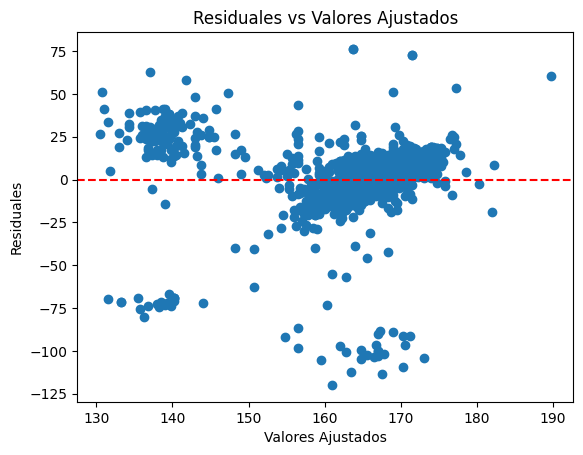

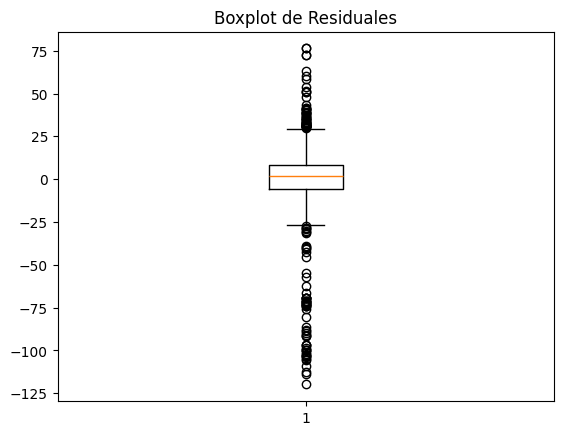

In [65]:
residuals = y - predicciones

plt.scatter(predicciones, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuales')
plt.title('Residuales vs Valores Ajustados')
plt.show()

plt.boxplot(residuals)
plt.title('Boxplot de Residuales')
plt.show()

En la gráfica, los puntos parecen estar bastante dispersos, sin un patrón muy evidente en forma de curva. Esto puede sugerir que, en general, el modelo está capturando bien una relación lineal. Sin embargo, puedo notar que en algunas áreas donde los puntos están más agrupados, lo cual podría ser una indicación de que ciertos subconjuntos de datos están influyendo de manera diferente. Aunque esto no es un incumplimiento grave del supuesto de linealidad, puede sugerir que podríamos estar perdiendo algo de información que tal vez un modelo un poco más complejo capturaría mejor.

En cuanto a la homocedasticidad, observando la gráfica, parece que en algunos lugares la dispersión de los puntos (los residuales) es mayor. Por ejemplo, en los extremos de los valores ajustados, algunos puntos parecen alejarse mucho más de la línea roja (que representa un error de cero) que en otras áreas. Esto puede indicar que el modelo tiene problemas para predecir bien en esos rangos y que los errores no son uniformes en toda la gráfica. En términos sencillos (que podría decir yo), significa que el modelo podría estar haciendo un mejor trabajo en algunas partes del rango de valores y un trabajo menos preciso en otras, lo cual es una señal de que el supuesto de homocedasticidad podría no estarse cumpliendo completamente.

Algunos puntos en la gráfica se encuentran muy lejos de la línea de cero, especialmente aquellos con residuales mayores a 25 o menores a -50.
Estos valores atípicos son importantes porque podrían estar influyendo en el ajuste del modelo. A veces, estos puntos extremos pueden “empujar” la línea de regresión en una dirección que no representa bien la mayoría de los datos. Si estos valores atípicos se deben a errores en los datos (por ejemplo, un error de entrada), sería mejor eliminarlos o corregirlos. Si son datos válidos, podría considerar yo, puede ser útil considerar un modelo que trate de una mejor manera estos casos extremos, ya que están afectando los resultados.

### *f. Pruebe la existencia de una relación lineal entre las variables: Plantee las hipótesis nula y alternativa. Use α = 0,05. Interprete el resultado en el contexto del problema.*

In [66]:
# Agregar constante para el término independiente
X_with_constant = sm.add_constant(X)

# Ajustar el modelo
modelo_stats = sm.OLS(y, X_with_constant).fit()

# Resumen del modelo que incluye el p-valor
print(modelo_stats.summary())

                            OLS Regression Results                            
Dep. Variable:              Height_cm   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     278.7
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           1.64e-57
Time:                        14:39:26   Log-Likelihood:                -6663.5
No. Observations:                1500   AIC:                         1.333e+04
Df Residuals:                    1498   BIC:                         1.334e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        120.4605      2.654     45.385      0.0

Paso 1: Hipótesis
Hipótesis Nula (H₀): No existe una relación lineal entre la envergadura (Armspan) y la altura (Height), es decir, el coeficiente de la envergadura es igual a cero (𝛽=0).
Hipótesis Alternativa (H₁): Existe una relación lineal significativa entre la envergadura y la altura, es decir, el coeficiente de la envergadura es diferente de cero (𝛽≠0).

Paso 2: Nivel de Significancia
Se ha establecido un nivel de significancia de 𝛼=0.05.

Paso 3: Resultados de la Prueba
Coeficiente de la envergadura (x1): El coeficiente es 0.2772, lo que significa que, en promedio, por cada centímetro adicional en la envergadura, se espera que la altura aumente en aproximadamente 0.277 cm.
Valor p asociado al coeficiente: El valor p para este coeficiente es 0.000 (en realidad, es menor que cualquier valor reportable), lo cual es mucho menor que 0.05.
F-statistic y su p-valor: El estadístico F es 278.7, con un valor p de 1.64e-57 (un número extremadamente bajo).

Conclusión
Dado que el p-valor del coeficiente de la envergadura es menor que 0.05, **rechazamos la hipótesis nula**. Esto significa que tenemos evidencia estadística suficiente para afirmar que existe una relación lineal significativa entre la envergadura y la altura en estos datos, con un nivel de confianza del 95%.

En términos prácticos, esto sugiere que la envergadura puede ser un predictor útil de la altura en esta muestra de datos, por lo menos en el intervalo que definimos.

### *g. Para la pendiente de la recta de regresión: Construya un intervalo de confianza del 95% ¿Este intervalo contiene el valor teórico según la hipótesis de da Vinci? ¿Qué implica esto sobre la validez de la hipótesis?*

Leonardo da Vinci propuso que la relación entre la envergadura de una persona y su altura es aproximadamente de 1:1, es decir, la pendiente de una línea que relacione estas dos variables debería ser cercana a **1**, tomando en cuenta un analisis de "correlación".

Para verificar esta hipótesis, construimos un intervalo de confianza al 95% para la pendiente en nuestro modelo de regresión. A partir del resumen del modelo, sabemos que:
- La pendiente estimada es **0.2772**.
- El error estándar de esta pendiente es **0.017**.

Para calcular el intervalo de confianza, utilizamos esta fórmula:

Intervalo de confianza = pendiente estimada ± t_α/2 × error estándar

Aplicando la formula a nuestros datos sería:

Intervalo de confianza=0.2772±1.96×0.017

Lo anterior da como resultado:

\[
Intervalo de confianza = [0.24388, 0.31052]
\]

El intervalo de confianza del 95% para la pendiente es **[0.24388, 0.31052]**. Este intervalo **no contiene el valor 1** que la hipótesis de da Vinci sugiere.

La hipótesis de da Vinci propone que la envergadura y la altura deberían estar en una proporción de 1:1 (pendiente = 1). Sin embargo, el intervalo de confianza calculado nos indica que la pendiente real en nuestros datos está lejos de 1.

Esto implica que, en este conjunto de datos, **la hipótesis de da Vinci no se sostiene**. En otras palabras, la envergadura no es un predictor perfecto de la altura en una relación 1:1.


### *h. Calcule e interprete: El coeficiente de correlación r. El coeficiente de determinación R^2. ¿Qué nos dicen estos valores sobre la fortaleza de la relación?*

In [67]:
r_squared = r2_score(y, predicciones)

r = np.sqrt(r_squared)

print(f"Coeficiente de correlación (r): {r:.4f}")
print(f"Coeficiente de determinación (R^2): {r_squared:.4f}")

Coeficiente de correlación (r): 0.3961
Coeficiente de determinación (R^2): 0.1569


Podemos observar que, la distancia entre los brazos extendidos horizontalmente (formando una “T” con el cuerpo) es aproximadamente igual a la estatura de la persona **NO** tiene buena correlación, es decir, la relación no es tan fuerte (según el coeficiente de correlación r). También, según el Coeficiente de determinación R^2 nos dice que apróximadamente el 15.69% de la altura de las personas se debe a la distancia entre los brazos extendidos horizontalmente (formando una “T” con el cuerpo). 

Como conclusión, lo anterior quiere decir que el modelo no puede predecir de forma precisa la estatura de una persona a partir de la distancia entre los brazos extendidos de esa persona.

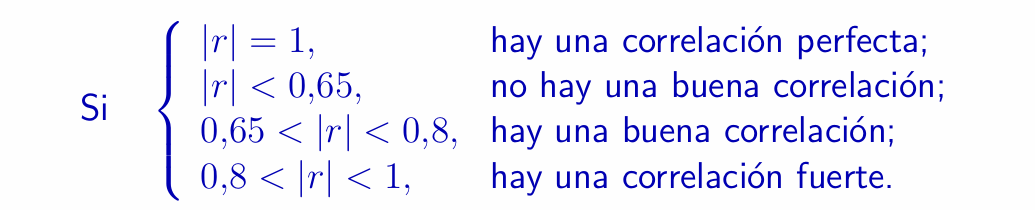

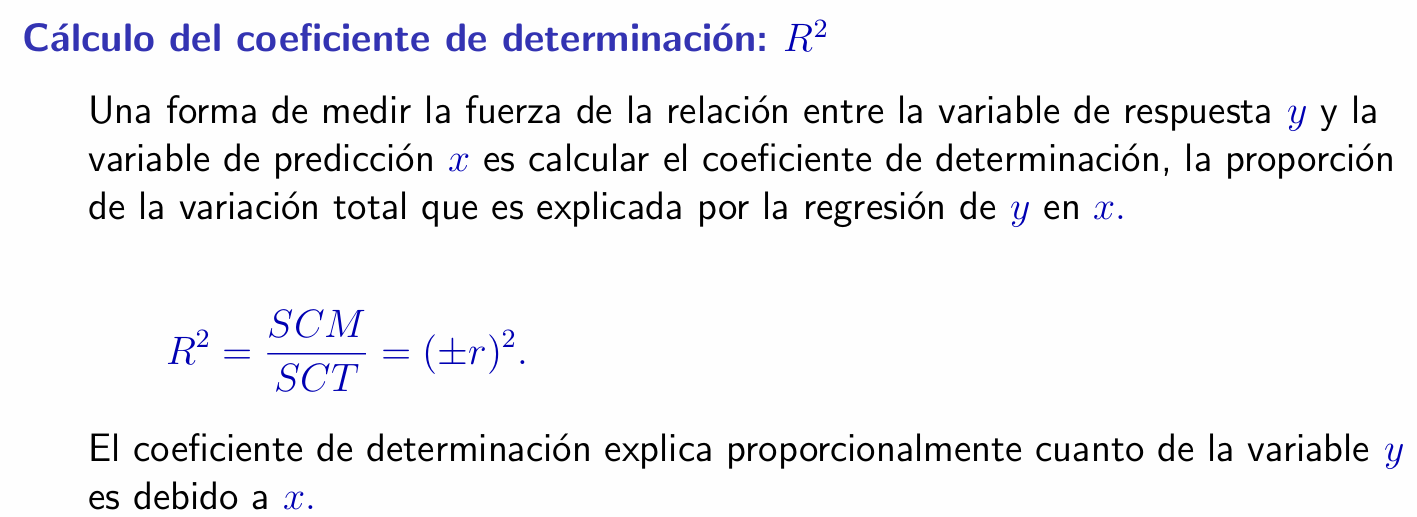